## Trabalho Prático - Módulo 1 - Ciência de Dados
##### **Com respotas do questionário**

## Objetivo:
Exercitar os seguintes conceitos trabalhados no Módulo:
- Uso do Google Colab.
- Uso do Power BI.
- Algoritmo K-Means.

**Novel Corona Virus 2019 Dataset**<br>
Enunciado

Para as questões relativas ao K-Means, trabalharemos com python e Google Colab. Serão
fornecidos alguns trechos de código em arquivo anexo para auxiliar na execução.
Considere um dataset gerado pelo seguinte comando:

*make_blobs(n_samples=500, centers=20, random_state=999)*

Ao executar o algoritmo K-Means, considere os parâmetros:

- init = k-means++
- max_iter = 300
- n_init = 10

Para as questões relativas ao COVID-19, instale o [Power BI Desktop](https://powerbi.microsoft.com/pt-br/downloads/), baixe o dataset

chamado “covid_19_data.csv” no link [Novel Corona Virus 2019](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=covid_19_data.csv) e carregue os dados no
Power BI. Atenção aos tipos de dados de cada coluna. Crie uma “Nova Medida” chamada
“Active” para calcular o número de casos ativos, que é no caso é o valor da coluna “Confirmed” menos a soma das colunas “Recovered” e “Deaths”. Crie gráficos para facilitar
a sua visualização de acordo com a questão.

## EDA

4


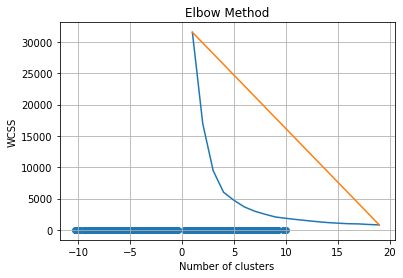

In [1]:
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


X, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(X[:,0], X[:,1])


def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1


wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
n = optimal_number_of_clusters(wcss)
print(n)


wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 20), wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

## Questionário

#### Pergunta 1
Qual o objetivo do algoritmo K-Means?

- Seleção

- Correlação

- Classificação

- Clusterização

#### Pergunta 2
O algoritmo K-Means é baseado em qual tipo de aprendizagem?

- Não supervisionada

- Por reforço

- Supervisionada

- Aleatória

#### Pergunta 3
Considerando o dataset gerado a partir das instruções do enunciado, qual das imagens representa o gráfico correto?

- ![tpdad01.png](https://drive.google.com/uc?id=1aH97lLSmxxno-C03aXU3e0v17FWlPD3z)

- ![tpdad02.png](https://drive.google.com/uc?id=1XAUwa3Knctx8NrEun2lqsJrxbGUS5sJL)

- ![tpdad03.png](https://drive.google.com/uc?id=1yGlqctIjtb8g7ONczteH73YfWVidb95n)
- ![tpdad04.png](https://drive.google.com/uc?id=1OaJaTK44I0l5-EXeuj36M8I8iO2LoKn1)

#### Pergunta 4
Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo K-Means seja executado buscando apenas 1 cluster, qual será a coordenada do centroide ao final da execução?

- [1.9050166 4.91200285]

- [ 0.02618523 -1.30384304]

- [ 2.40603415 6.29715718]

- [1.03796387 -5.49096674]


#### Pergunta 5
Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando apenas 1 cluster, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?

- 1068.2049059143994

- 34737.56779526727

- 61186.525771621105

- 31547.372471390485


#### Pergunta 6
Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando 5 clusters, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?

- 4717.404091931214

- 1853.7783832527882

- 6005.101775346179

- 9464.847250570496

#### Pergunta 7
Considerando o dataset gerado a partir das instruções do enunciado. Qual o número ideal de clusters?

- 4

- 7

- 5

- 3


#### Pergunta 8
Utilizando o Power BI e o dataset das instruções do enunciado. Ao criar um gráfico com as medidas “Confirmed”, “Deaths”, “Recovered” e “Active” apenas para a China (Mainland China), como fica o gráfico?

- ![tpdad05.png](https://drive.google.com/uc?id=1nuxmnR4BIaacyMRoJs7yesitkLFnwrvm)

- ![tpdad06.png](https://drive.google.com/uc?id=11DrPsfmx-2cFD_QY-ZSXpOtEWSvLxEoE)

- ![tpdad07.png](https://drive.google.com/uc?id=1r5S20EzSYyf72Ql0ZODu27xpf85ZB8N7)
- ![tpdad08.png](https://drive.google.com/uc?id=12kMqBe1qxar1zaqHQ7XcoULHXXW-0XSk)


#### Pergunta 9
Utilizando o Power BI e o dataset das instruções do enunciado. Filtre por país, selecionando a Itália (Italy), analise as informações do dataset e responda: Em que mês o país passou a ter mais casos recuperados do que casos ativos?

- Fevereiro

- Maio

- Março

- Abril


#### Pergunta 10
Utilizando o Power BI e o dataset das instruções do enunciado. Filtre por país, selecionando a Coreia do Sul (South Korea). Em que mês esse país atingiu o pico de casos ativos?

- Março

- Janeiro

- Abril

- Fevereiro


#### Pergunta 11
Utilizando o Power BI e o dataset das instruções do enunciado. Ao criar um gráfico com a medida “Active” apenas para a Itália (Italy), como fica o gráfico?

- ![dad-tp01-01.png](https://drive.google.com/uc?id=17NeaQRLcNdmlZs4UE6eFuDzsGJ81X84W)

- ![dad-tp01-02.png](https://drive.google.com/uc?id=1dPXNGRkNUDPHYqkcEpvVymEgVGSHtk_v)

- ![dad-tp01-03.png](https://drive.google.com/uc?id=1mQzc-Vdv7SxOGYuUzz2mprI8yCt1WkoW)
- ![dad-tp01-04.png](https://drive.google.com/uc?id=1-YY-o92suGspWxSjxVYwIZW7iphVmias)


#### Pergunta 12
Utilizando o Power BI e o dataset das instruções do enunciado. Filtre por país, selecionando a Venezuela, analise as informações, perceba que algumas vezes o número de casos recuperados foi maior que o de casos ativos. Em que mês isso ocorreu pela primeira vez?

- Abril

- Fevereiro

- Março

- Maio
